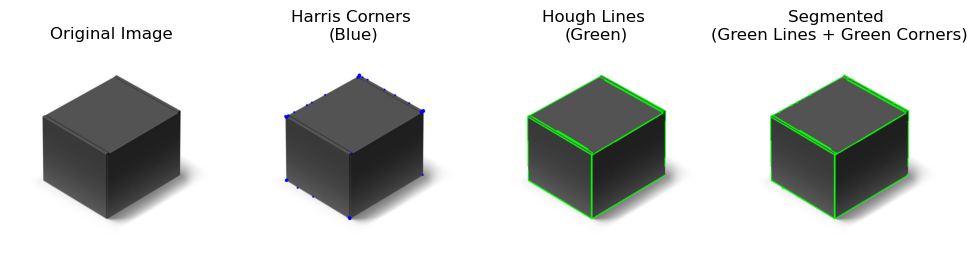

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/black box.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# 🔹 Harris Corner Detection
gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, blockSize=3, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)  # Dilate to enhance
thresh = 0.01 * dst.max()  # Lower threshold for better detection

# Copy image for corner visualization
corners_image = np.copy(image_rgb)

# Draw Harris Corners in **Blue**
for j in range(dst.shape[0]):
    for i in range(dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corners_image, (i, j), 3, (0, 0, 255), -1)  # Blue color (BGR -> RGB)

# 🔹 Alternative: Use GoodFeaturesToTrack for Better Corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int32(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(corners_image, (x, y), 3, (0, 0, 255), -1)  # Red color

# 🔹 Canny Edge Detection & Hough Transform
edges = cv2.Canny(gray, 40, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

# Copy image for line visualization
lines_image = np.copy(image_rgb)

# Draw detected lines in **Green**
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# 🔹 Combine Corners & Lines (Final Segmentation)
segmented_image = np.copy(lines_image)
for i in corners:
    x, y = i.ravel()
    cv2.circle(segmented_image, (x, y), 3, (0, 255, 0), -1)  # Green Corners

# 🔹 Display Results using Subplots
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(corners_image)
plt.title("Harris Corners \n(Blue)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lines_image)
plt.title("Hough Lines \n(Green)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(segmented_image)
plt.title("Segmented \n(Green Lines + Green Corners)")
plt.axis('off')

plt.show()

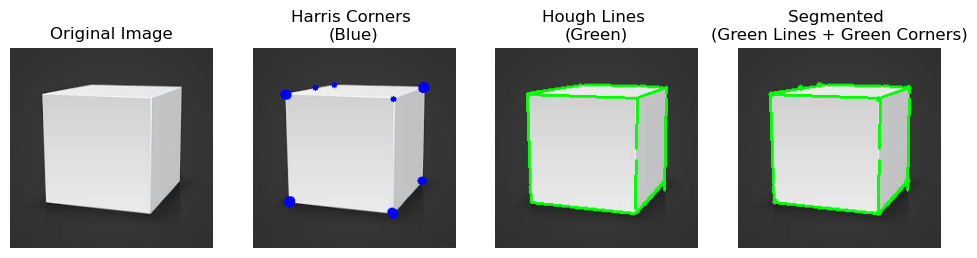

In [30]:
image = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Afraa/Images/white box.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# 🔹 Harris Corner Detection
gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, blockSize=3, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)  # Dilate to enhance
thresh = 0.01 * dst.max()  # Lower threshold for better detection

# Copy image for corner visualization
corners_image = np.copy(image_rgb)

# Draw Harris Corners in **Blue**
for j in range(dst.shape[0]):
    for i in range(dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corners_image, (i, j), 3, (0, 0, 255), -1)  # Blue color (BGR -> RGB)

# 🔹 Alternative: Use GoodFeaturesToTrack for Better Corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int32(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(corners_image, (x, y), 3, (0, 0, 255), -1)  # Red color

# 🔹 Canny Edge Detection & Hough Transform
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=10, maxLineGap=10)

# Copy image for line visualization
lines_image = np.copy(image_rgb)

# Draw detected lines in **Green**
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# 🔹 Combine Corners & Lines (Final Segmentation)
segmented_image = np.copy(lines_image)
for i in corners:
    x, y = i.ravel()
    cv2.circle(segmented_image, (x, y), 3, (0, 255, 0), -1)  # Green Corners

# 🔹 Display Results using Subplots
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(corners_image)
plt.title("Harris Corners \n(Blue)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lines_image)
plt.title("Hough Lines \n(Green)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(segmented_image)
plt.title("Segmented \n(Green Lines + Green Corners)")
plt.axis('off')

plt.show()